# t-SNE (t-Distributed Stochastic Neighbor Embedding)
> 비선형 방법으로 차원을 축소하는 방법 (PCA는 선형 방법)  
> 주로 시각화 툴로 사용

<br/>
<br/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from IPython.display import display, HTML
warnings.filterwarnings('ignore')
display(HTML('<style>.container {width : 100% !important}</style>'))

<br/>
<br/>
<br/>
<br/>

## Data
- mnist dataset : 64 dim

In [2]:
from sklearn.datasets import load_digits

data = load_digits()
X = data.data
y = data.target

X.shape, y.shape

((1797, 64), (1797,))

<br/>
<br/>

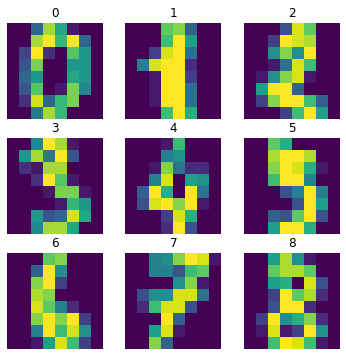

In [3]:
plt.figure(figsize = (6,6))

for i in range(9) :
    plt.subplot(3,3,i+1)
    plt.imshow(X[i].reshape(8,8))
    plt.axis(False)
    plt.title(y[i])
    
plt.show()

<br/>
<br/>
<br/>
<br/>

## t-SNE
- 2차원으로 축소

In [4]:
from sklearn.manifold import TSNE

# 2차원으로 축소
n_components = 2

model = TSNE(n_components  = n_components)
X_sne = model.fit_transform(X)

print(X.shape, X_sne.shape)

(1797, 64) (1797, 2)


<br/>
<br/>

In [5]:
df_sne = pd.DataFrame(X_sne, columns = ['X1', 'X2'])
df_sne['y'] = y
df_sne.head()

,X1,X2,y
0,-8.318355,63.669487,0
1,11.911578,-16.624609,1
2,-16.266209,-21.533937,2
3,-36.289955,8.721255,3
4,45.743542,-7.874814,4


<br/>
<br/>

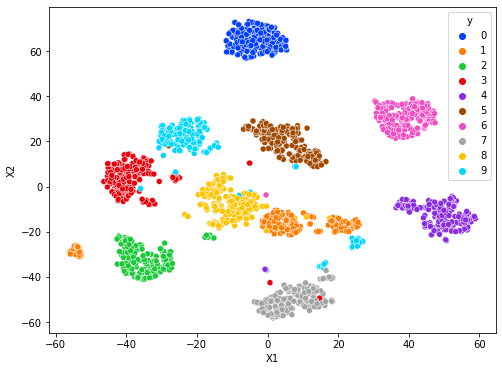

In [6]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df_sne, x = 'X1', y = 'X2',
                hue = 'y', palette = 'bright')
plt.show()

<br/>
<br/>

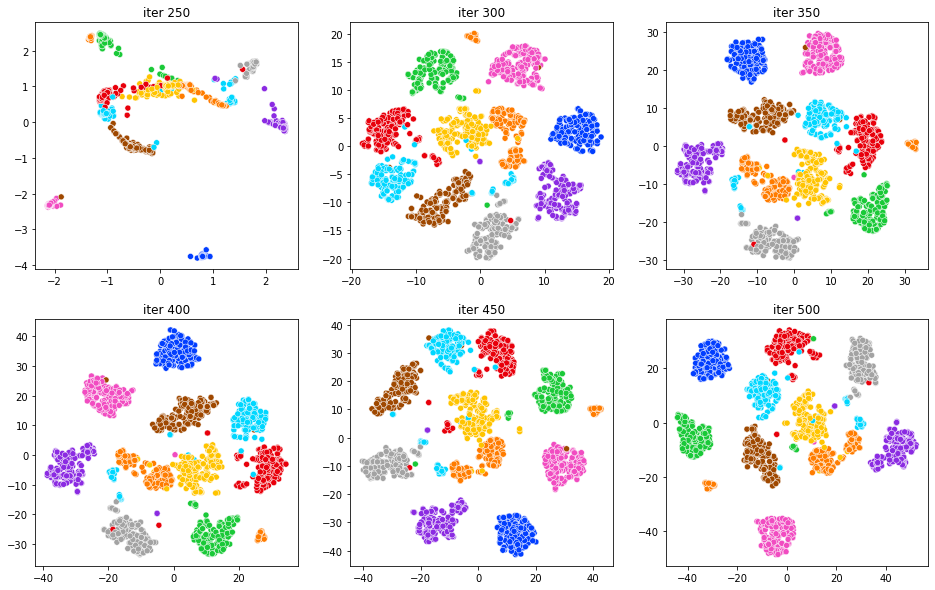

In [7]:
iters = [250, 300, 350, 400, 450, 500]
plt.figure(figsize = (16,10))

for i, n_iter in enumerate(iters) :
    plt.subplot(2, 3, i+1)
    model = TSNE(n_components  = n_components, n_iter = n_iter)
    X_sne = model.fit_transform(X)

    df_sne = pd.DataFrame(X_sne, columns = ['X1', 'X2'])
    df_sne['y'] = y
    df_sne.head()

    sns.scatterplot(data = df_sne, x = 'X1', y = 'X2',
                    hue = 'y', palette = 'bright', legend = False)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(f'iter {n_iter}')
plt.show()

<br/>
<br/>
<br/>
<br/>

## PCA vs t-SNE

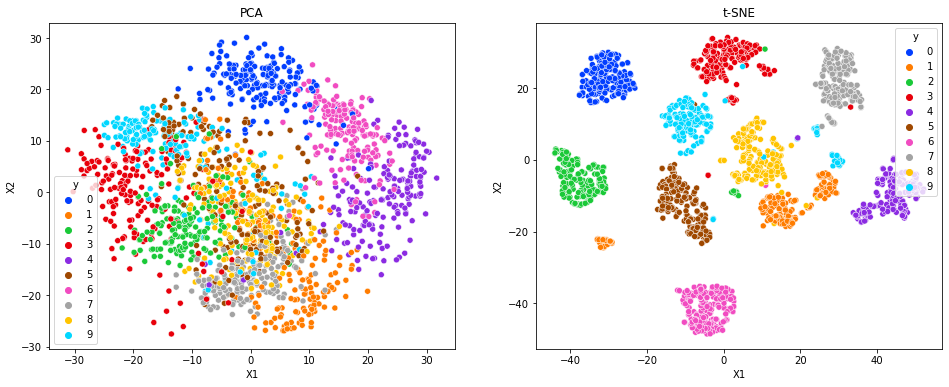

In [8]:
from sklearn.decomposition import PCA

X_pca = PCA(n_components = n_components).fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns = ['X1', 'X2'])
df_pca['y'] = y


plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.scatterplot(data = df_pca, x = 'X1', y = 'X2',
                hue = 'y', palette = 'bright')
plt.title('PCA')

plt.subplot(1,2,2)
sns.scatterplot(data = df_sne, x = 'X1', y = 'X2',
                hue = 'y', palette = 'bright')
plt.title('t-SNE')

plt.show()

<br/>
<br/>
<br/>
<br/>

## Reference
- https://gaussian37.github.io/ml-concept-t_sne/